In [24]:
import pandas as pd

In [102]:
from  sklearn import metrics 

In [25]:
import seaborn

In [26]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [27]:
import numpy as np

In [28]:
from sklearn import preprocessing

In [29]:
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("file:///C:/Users/P4/Desktop/datacat.csv")

In [31]:
df.head()

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,totConVal,CPM,costPerCon,ROAS,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
0,1121091,1178,144531,10,1194718,141,254.049996,28,14,42,...,1540,0.212644,6.048809,6.061799,0,1,1,0,0,0
1,1121092,1178,144531,10,637648,67,122.400000,13,5,18,...,565,0.191955,6.800000,4.616013,0,1,1,0,0,0
2,1121094,1178,144531,10,24362,0,0.000000,1,1,2,...,105,0.000000,0.000000,inf,0,1,1,0,0,0
3,1121095,1178,144531,10,459690,50,86.330001,5,2,7,...,225,0.187800,12.332857,2.606278,0,1,1,0,0,0
4,1121096,1178,144531,10,750060,86,161.909999,11,2,13,...,255,0.215863,12.454615,1.574949,0,1,1,0,0,0


In [32]:
encoded=df[['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'ROAS', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49']].apply(LabelEncoder().fit_transform)

In [33]:
bigdata =pd.concat([encoded], axis=1)

In [34]:
bigdata.columns.values

array(['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks',
       'Spent', 'conv', 'appConv', 'totConv', 'appConVal', 'conVal',
       'totConVal', 'CPM', 'costPerCon', 'ROAS', 'gender_F', 'gender_M',
       'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49'], dtype=object)

In [35]:
bigdata.dtypes

ad_id         int32
xyzCampId     int32
fbCampId      int32
interest      int32
impr          int32
Clicks        int32
Spent         int32
conv          int32
appConv       int32
totConv       int32
appConVal     int32
conVal        int32
totConVal     int32
CPM           int32
costPerCon    int32
ROAS          int32
gender_F      int32
gender_M      int32
age_30-34     int32
age_35-39     int32
age_40-44     int32
age_45-49     int32
dtype: object

In [36]:
df.dtypes

ad_id           int64
xyzCampId       int64
fbCampId        int64
interest        int64
impr            int64
Clicks          int64
Spent         float64
conv            int64
appConv         int64
totConv         int64
appConVal       int64
conVal          int64
totConVal       int64
CPM           float64
costPerCon    float64
ROAS          float64
gender_F        int64
gender_M        int64
age_30-34       int64
age_35-39       int64
age_40-44       int64
age_45-49       int64
dtype: object

In [37]:
X=bigdata.loc[:,df.columns!='ROAS']

In [38]:
print(X.columns.values)

['ad_id' 'xyzCampId' 'fbCampId' 'interest' 'impr' 'Clicks' 'Spent' 'conv'
 'appConv' 'totConv' 'appConVal' 'conVal' 'totConVal' 'CPM' 'costPerCon'
 'gender_F' 'gender_M' 'age_30-34' 'age_35-39' 'age_40-44' 'age_45-49']


In [39]:
print(X.shape)

(625, 21)


In [40]:
Y=bigdata.loc[:,df.columns=='ROAS']

In [41]:
Y.columns.values

array(['ROAS'], dtype=object)

In [42]:
print(Y.shape)

(625, 1)


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [52]:
np.isnan(df.any())

ad_id         False
xyzCampId     False
fbCampId      False
interest      False
impr          False
Clicks        False
Spent         False
conv          False
appConv       False
totConv       False
appConVal     False
conVal        False
totConVal     False
CPM           False
costPerCon    False
ROAS          False
gender_F      False
gender_M      False
age_30-34     False
age_35-39     False
age_40-44     False
age_45-49     False
dtype: bool

In [54]:
np.isfinite(df.all())

ad_id         True
xyzCampId     True
fbCampId      True
interest      True
impr          True
Clicks        True
Spent         True
conv          True
appConv       True
totConv       True
appConVal     True
conVal        True
totConVal     True
CPM           True
costPerCon    True
ROAS          True
gender_F      True
gender_M      True
age_30-34     True
age_35-39     True
age_40-44     True
age_45-49     True
dtype: bool

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier ()

In [58]:
rf.fit(X_train,Y_train) 

C:\Users\P4\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\P4\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rf.score (X_train,Y_train)

1.0

In [61]:
Y_pred=rf.predict(X_test)

In [62]:
Y_pred

array([382, 515, 321, 610, 312,  10,  63,  42,  67, 163, 457, 149, 602,
         0, 201, 386, 354, 268, 347, 610,  58, 296, 282, 510, 143,  81,
       180, 100, 396,  47, 347, 436, 121, 243, 146, 416, 115, 514,  61,
       376, 555, 193, 581, 583, 312, 307, 280, 166,  77, 365, 498,  24,
        71, 100, 193, 222, 425, 331, 312,   3, 274, 507, 193, 286, 211,
       290,  35, 505, 151, 416, 140, 115, 367, 330, 117, 497, 398, 323,
       342,   0,  86, 143, 371, 254,  84,  84, 193, 390, 242, 574,  80,
       515, 339, 470, 398, 610,  43, 106, 330, 191, 345, 221, 106,  47,
        17, 478, 501,  88, 109,  96, 356, 534,  76,  41, 166, 272,  50,
       264, 222, 261, 254, 122, 327, 211,  50], dtype=int32)

In [63]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)

In [64]:
print(feature_importances)

            importance
CPM           0.099796
costPerCon    0.098674
impr          0.095491
Spent         0.091111
fbCampId      0.083684
Clicks        0.081983
ad_id         0.079212
interest      0.070905
totConVal     0.049155
totConv       0.042184
conVal        0.037494
conv          0.034481
appConVal     0.025231
appConv       0.022378
age_40-44     0.018447
gender_M      0.016453
gender_F      0.015490
age_45-49     0.013168
age_30-34     0.012356
age_35-39     0.012307
xyzCampId     0.000000


In [74]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [79]:
cm=confusion_matrix(Y_test,Y_pred)

In [81]:
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [93]:
from pylab import *

In [84]:
bigdata.corr()

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,totConVal,CPM,costPerCon,ROAS,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
ad_id,1.000000,NaN,0.984347,0.503029,0.136800,0.231993,0.175548,0.001746,-0.079936,-0.009229,...,-0.033675,0.314803,0.214253,-0.190121,0.688086,-0.688086,-0.356668,-0.071489,0.157567,0.313197
xyzCampId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbCampId,0.984347,NaN,1.000000,0.572105,0.156097,0.234343,0.178094,0.044918,-0.047216,0.032111,...,0.000345,0.248103,0.178042,-0.162886,0.649420,-0.649420,-0.323238,-0.083025,0.145372,0.299585
interest,0.503029,NaN,0.572105,1.000000,-0.043661,-0.074284,-0.098962,0.006262,-0.041930,-0.003652,...,-0.025239,-0.186525,-0.112258,0.045942,0.063204,-0.063204,-0.045076,-0.004112,0.037398,0.018025
impr,0.136800,NaN,0.156097,-0.043661,1.000000,0.897627,0.975289,0.629135,0.497960,0.634921,...,0.584258,0.356307,0.532588,-0.235052,0.193657,-0.193657,-0.059976,-0.059926,-0.015075,0.140035
Clicks,0.231993,NaN,0.234343,-0.074284,0.897627,1.000000,0.922368,0.652577,0.516957,0.652395,...,0.591020,0.454244,0.496610,-0.239621,0.317464,-0.317464,-0.144129,-0.091301,0.012178,0.237852
Spent,0.175548,NaN,0.178094,-0.098962,0.975289,0.922368,1.000000,0.586580,0.461322,0.590987,...,0.542615,0.533505,0.616627,-0.302716,0.265156,-0.265156,-0.159296,-0.064741,0.035375,0.205935
conv,0.001746,NaN,0.044918,0.006262,0.629135,0.652577,0.586580,1.000000,0.862853,0.986981,...,0.883062,0.025931,-0.116698,0.198733,0.098563,-0.098563,0.189642,-0.072095,-0.087221,-0.053403
appConv,-0.079936,NaN,-0.047216,-0.041930,0.497960,0.516957,0.461322,0.862853,1.000000,0.918615,...,0.957871,-0.005790,-0.200807,0.414913,0.016707,-0.016707,0.176100,-0.064258,-0.069762,-0.062963
totConv,-0.009229,NaN,0.032111,-0.003652,0.634921,0.652395,0.590987,0.986981,0.918615,1.000000,...,0.943496,0.027988,-0.141329,0.276679,0.091364,-0.091364,0.186604,-0.065247,-0.089301,-0.054917


In [97]:
corr=bigdata.corr()

In [98]:
corr

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,totConVal,CPM,costPerCon,ROAS,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
ad_id,1.000000,NaN,0.984347,0.503029,0.136800,0.231993,0.175548,0.001746,-0.079936,-0.009229,...,-0.033675,0.314803,0.214253,-0.190121,0.688086,-0.688086,-0.356668,-0.071489,0.157567,0.313197
xyzCampId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbCampId,0.984347,NaN,1.000000,0.572105,0.156097,0.234343,0.178094,0.044918,-0.047216,0.032111,...,0.000345,0.248103,0.178042,-0.162886,0.649420,-0.649420,-0.323238,-0.083025,0.145372,0.299585
interest,0.503029,NaN,0.572105,1.000000,-0.043661,-0.074284,-0.098962,0.006262,-0.041930,-0.003652,...,-0.025239,-0.186525,-0.112258,0.045942,0.063204,-0.063204,-0.045076,-0.004112,0.037398,0.018025
impr,0.136800,NaN,0.156097,-0.043661,1.000000,0.897627,0.975289,0.629135,0.497960,0.634921,...,0.584258,0.356307,0.532588,-0.235052,0.193657,-0.193657,-0.059976,-0.059926,-0.015075,0.140035
Clicks,0.231993,NaN,0.234343,-0.074284,0.897627,1.000000,0.922368,0.652577,0.516957,0.652395,...,0.591020,0.454244,0.496610,-0.239621,0.317464,-0.317464,-0.144129,-0.091301,0.012178,0.237852
Spent,0.175548,NaN,0.178094,-0.098962,0.975289,0.922368,1.000000,0.586580,0.461322,0.590987,...,0.542615,0.533505,0.616627,-0.302716,0.265156,-0.265156,-0.159296,-0.064741,0.035375,0.205935
conv,0.001746,NaN,0.044918,0.006262,0.629135,0.652577,0.586580,1.000000,0.862853,0.986981,...,0.883062,0.025931,-0.116698,0.198733,0.098563,-0.098563,0.189642,-0.072095,-0.087221,-0.053403
appConv,-0.079936,NaN,-0.047216,-0.041930,0.497960,0.516957,0.461322,0.862853,1.000000,0.918615,...,0.957871,-0.005790,-0.200807,0.414913,0.016707,-0.016707,0.176100,-0.064258,-0.069762,-0.062963
totConv,-0.009229,NaN,0.032111,-0.003652,0.634921,0.652395,0.590987,0.986981,0.918615,1.000000,...,0.943496,0.027988,-0.141329,0.276679,0.091364,-0.091364,0.186604,-0.065247,-0.089301,-0.054917


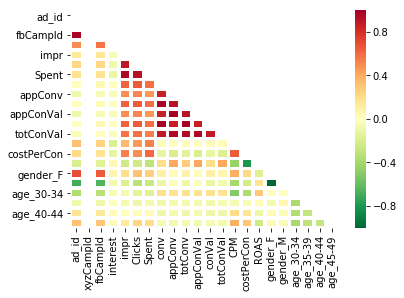

In [101]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
seaborn.heatmap(corr,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5)

In [103]:
corr_matrix=df.corr().abs()

In [104]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [105]:
to_drop=[column for column in upper.columns if any(upper[column]>0.5)]

In [106]:
to_drop

['fbCampId',
 'interest',
 'Clicks',
 'Spent',
 'conv',
 'appConv',
 'totConv',
 'appConVal',
 'conVal',
 'totConVal',
 'gender_M']

In [16]:
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] > 0.5:
            if columns[j]:
                columns[j] = False

selected_columns = df.columns[columns]

data = df[selected_columns]

In [17]:
data

,ad_id,xyzCampId,impr,CPM,costPerCon,ROAS,gender_F,age_30-34,age_35-39,age_40-44,age_45-49
0,1121091,1178,1194718,0.212644,6.048809,6.061799,0,1,0,0,0
1,1121092,1178,637648,0.191955,6.800000,4.616013,0,1,0,0,0
2,1121094,1178,24362,0.000000,0.000000,inf,0,1,0,0,0
3,1121095,1178,459690,0.187800,12.332857,2.606278,0,1,0,0,0
4,1121096,1178,750060,0.215863,12.454615,1.574949,0,1,0,0,0
5,1121097,1178,30068,0.060529,1.820000,2.747253,0,1,0,0,0
6,1121098,1178,1267550,0.186793,6.963823,4.730329,0,1,0,0,0
7,1121100,1178,3052003,0.209682,8.311039,3.125244,0,1,0,0,0
8,1121101,1178,29945,0.053097,0.530000,69.182389,0,1,0,0,0
9,1121102,1178,357856,0.148020,5.297000,6.324335,0,1,0,0,0


In [126]:
cm = confusion_matrix(Y_test, Y_pred)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/X_test.shape[0]
print(accuracy)

0.016


In [134]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.1)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [ ]:
 high_corr_var

In [136]:
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] > 0.5:
            if columns[j]:
                columns[j] = False

selected_columns = df.columns[columns]

data = df[selected_columns]

In [137]:
data

,ad_id,xyzCampId,impr,CPM,costPerCon,ROAS,gender_F,age_30-34,age_35-39,age_40-44,age_45-49
0,1121091,1178,1194718,0.212644,6.048809,6.061799,0,1,0,0,0
1,1121092,1178,637648,0.191955,6.800000,4.616013,0,1,0,0,0
2,1121094,1178,24362,0.000000,0.000000,inf,0,1,0,0,0
3,1121095,1178,459690,0.187800,12.332857,2.606278,0,1,0,0,0
4,1121096,1178,750060,0.215863,12.454615,1.574949,0,1,0,0,0
5,1121097,1178,30068,0.060529,1.820000,2.747253,0,1,0,0,0
6,1121098,1178,1267550,0.186793,6.963823,4.730329,0,1,0,0,0
7,1121100,1178,3052003,0.209682,8.311039,3.125244,0,1,0,0,0
8,1121101,1178,29945,0.053097,0.530000,69.182389,0,1,0,0,0
9,1121102,1178,357856,0.148020,5.297000,6.324335,0,1,0,0,0


In [18]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''
# Crée la matrice de corrélation 
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Itère dans le tableau de la matrice de corrélation pour trouver les colonnes corrélées
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Imprime le jeu de fonctionnalités corrélées et le corr
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    #Supprime les colonnes corrélées
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        data = x.drop(col, axis=1)

    return data
print(data)

       ad_id  xyzCampId     impr       CPM  costPerCon       ROAS  gender_F  \
0    1121091       1178  1194718  0.212644    6.048809   6.061799         0   
1    1121092       1178   637648  0.191955    6.800000   4.616013         0   
2    1121094       1178    24362  0.000000    0.000000        inf         0   
3    1121095       1178   459690  0.187800   12.332857   2.606278         0   
4    1121096       1178   750060  0.215863   12.454615   1.574949         0   
5    1121097       1178    30068  0.060529    1.820000   2.747253         0   
6    1121098       1178  1267550  0.186793    6.963823   4.730329         0   
7    1121100       1178  3052003  0.209682    8.311039   3.125244         0   
8    1121101       1178    29945  0.053097    0.530000  69.182389         0   
9    1121102       1178   357856  0.148020    5.297000   6.324335         0   
10   1121104       1178  2080666  0.173094    5.904098   6.386228         0   
11   1121105       1178   145999  0.113151    2.3600

In [14]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.5)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [15]:
high_corr_var

[('ad_id', 'fbCampId'),
 ('ad_id', 'interest'),
 ('fbCampId', 'interest'),
 ('impr', 'Clicks'),
 ('impr', 'Spent'),
 ('impr', 'conv'),
 ('impr', 'appConv'),
 ('impr', 'totConv'),
 ('impr', 'appConVal'),
 ('impr', 'conVal'),
 ('impr', 'totConVal'),
 ('Clicks', 'Spent'),
 ('Clicks', 'conv'),
 ('Clicks', 'appConv'),
 ('Clicks', 'totConv'),
 ('Clicks', 'appConVal'),
 ('Clicks', 'conVal'),
 ('Clicks', 'totConVal'),
 ('Spent', 'conv'),
 ('Spent', 'appConv'),
 ('Spent', 'totConv'),
 ('Spent', 'appConVal'),
 ('Spent', 'conVal'),
 ('Spent', 'totConVal'),
 ('conv', 'appConv'),
 ('conv', 'totConv'),
 ('conv', 'appConVal'),
 ('conv', 'conVal'),
 ('conv', 'totConVal'),
 ('appConv', 'totConv'),
 ('appConv', 'appConVal'),
 ('appConv', 'conVal'),
 ('appConv', 'totConVal'),
 ('totConv', 'appConVal'),
 ('totConv', 'conVal'),
 ('totConv', 'totConVal'),
 ('appConVal', 'conVal'),
 ('appConVal', 'totConVal'),
 ('conVal', 'totConVal'),
 ('gender_F', 'gender_M')]

In [79]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
resultat=regressor.fit(X_train, Y_train)

In [80]:
resultat

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
regressor.score (X_train,Y_train)

0.8283111478598509

In [75]:
print(regressor.intercept_) 

[517.30335906]


In [76]:
print(regressor.coef_) 

[[ 9.41610585e-02 -1.04305453e-13 -2.94232039e-01  3.57028931e-01
   8.49330550e-02 -2.40069585e-01  4.66399387e-01 -1.35167935e+01
   2.39600922e+01 -4.86728765e-01  2.39600922e+01 -1.35167935e+01
   1.01555462e+00  2.87799206e-03 -1.09373552e+00  2.38812851e+00
  -2.38812851e+00 -4.50523911e+00 -7.27255742e+00  1.36662963e+01
  -1.88849979e+00]]


In [69]:
Y_pred=regressor.predict(X_test)

In [90]:
Y_pred

array([[186.55889092],
       [467.33334948],
       [303.32132289],
       [497.126634  ],
       [452.45817576],
       [ 34.96060222],
       [202.37781355],
       [ 61.25243971],
       [125.38840148],
       [498.7649138 ],
       [587.91519387],
       [475.63635718],
       [549.29716721],
       [ 54.1890937 ],
       [385.37322638],
       [494.82115939],
       [350.76615575],
       [552.14926449],
       [130.12088417],
       [477.67680411],
       [175.94526224],
       [229.10243978],
       [430.70321945],
       [320.16085533],
       [351.31820707],
       [ 97.77956699],
       [466.10848879],
       [102.46387157],
       [533.61786536],
       [ 91.82292172],
       [290.58912013],
       [666.74052983],
       [199.40907137],
       [403.58422474],
       [211.65579172],
       [478.91037329],
       [105.49625414],
       [458.2372662 ],
       [ 57.1388182 ],
       [487.45338364],
       [601.89634128],
       [499.1157066 ],
       [505.34662845],
       [542

In [100]:
print('Coefficient: \n', regressor.coef_)
print('Coefficient: \n', regressor.copy_X)

Coefficient: 
 [[ 9.41610585e-02 -1.04305453e-13 -2.94232039e-01  3.57028931e-01
   8.49330550e-02 -2.40069585e-01  4.66399387e-01 -1.35167935e+01
   2.39600922e+01 -4.86728765e-01  2.39600922e+01 -1.35167935e+01
   1.01555462e+00  2.87799206e-03 -1.09373552e+00  2.38812851e+00
  -2.38812851e+00 -4.50523911e+00 -7.27255742e+00  1.36662963e+01
  -1.88849979e+00]]
Coefficient: 
 True


In [87]:
bigdata.columns

Index(['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'ROAS', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49'],
      dtype='object')

In [103]:
print(metrics.mean_absolute_error(Y_test,Y_pred))
print(metrics.mean_squared_error(Y_test,Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

65.59346706144987
6873.216820792317
82.90486608633005


In [105]:
mase = np.mean(np.abs(Y_test-Y_pred)/Y_test) * 100

print(mase)

ROAS    inf
dtype: float64
